In [ ]:
#import modules for analyzing ,plotting, and formatting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import sqlite3
!pip install --upgrade geopandas
import matplotlib.image as mpimg
import os
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import folium 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.6 MB/s eta 0:00:00


In [ ]:
!pip install contextily
import contextily as cx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 175.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 44.2 MB/s eta 0:00:00


In [ ]:
wildfire = pd.read_csv('wildfire_ca.csv')
weather = pd.read_csv('weather_ca.csv')

<ipython-input-3-6d6cd806b996>:1: DtypeWarning: Columns (13,14,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire = pd.read_csv('wildfire_ca.csv')


In [ ]:
wildfire.head()

,Unnamed: 0.1,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [ ]:
wildfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189550 entries, 0 to 189549
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0.1                189550 non-null  int64  
 1   Unnamed: 0                  189550 non-null  int64  
 2   OBJECTID                    189550 non-null  int64  
 3   FOD_ID                      189550 non-null  int64  
 4   FPA_ID                      189550 non-null  object 
 5   SOURCE_SYSTEM_TYPE          189550 non-null  object 
 6   SOURCE_SYSTEM               189550 non-null  object 
 7   NWCG_REPORTING_AGENCY       189550 non-null  object 
 8   NWCG_REPORTING_UNIT_ID      189550 non-null  object 
 9   NWCG_REPORTING_UNIT_NAME    189550 non-null  object 
 10  SOURCE_REPORTING_UNIT       189550 non-null  object 
 11  SOURCE_REPORTING_UNIT_NAME  189550 non-null  object 
 12  LOCAL_FIRE_REPORT_ID        61933 non-null   float64
 13  LOCAL_INCIDENT

In [ ]:
wildfires = wildfire.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'OBJECTID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', \
                          'NWCG_REPORTING_UNIT_ID', 'SOURCE_REPORTING_UNIT', 'NWCG_REPORTING_UNIT_NAME', 'FIRE_CODE', 'FIRE_NAME', \
                          'ICS_209_INCIDENT_NUMBER','ICS_209_NAME', 'MTBS_ID', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', \
                          'LOCAL_INCIDENT_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'DISCOVERY_DATE', 'CONT_DATE', 'FIPS_NAME', 'Shape',\
                          'OWNER_CODE', 'FOD_ID', 'FIPS_CODE', 'STATE'])

wildfires.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,COUNTY
0,2005,33,1300.0,9.0,Miscellaneous,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,63.0
1,2004,133,845.0,1.0,Lightning,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,61.0
2,2004,152,1921.0,5.0,Debris Burning,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,17.0
3,2004,180,1600.0,1.0,Lightning,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,3.0
4,2004,180,1600.0,1.0,Lightning,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,3.0


In [ ]:
print(wildfires.STAT_CAUSE_DESCR.value_counts())
print(wildfires.FIRE_SIZE_CLASS.value_counts())

Miscellaneous        51943
Equipment Use        39407
Lightning            27000
Arson                19635
Debris Burning       14318
Missing/Undefined    12605
Campfire              9516
Children              6930
Smoking               5936
Powerline             1198
Railroad               720
Fireworks              219
Structure              123
Name: STAT_CAUSE_DESCR, dtype: int64
A    98309
B    76942
C     9825
D     2137
E     1187
F      756
G      394
Name: FIRE_SIZE_CLASS, dtype: int64


In [ ]:
wildfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189550 entries, 0 to 189549
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FIRE_YEAR         189550 non-null  int64  
 1   DISCOVERY_DOY     189550 non-null  int64  
 2   DISCOVERY_TIME    110217 non-null  float64
 3   STAT_CAUSE_CODE   189550 non-null  float64
 4   STAT_CAUSE_DESCR  189550 non-null  object 
 5   CONT_DOY          91908 non-null   float64
 6   CONT_TIME         91198 non-null   float64
 7   FIRE_SIZE         189550 non-null  float64
 8   FIRE_SIZE_CLASS   189550 non-null  object 
 9   LATITUDE          189550 non-null  float64
 10  LONGITUDE         189550 non-null  float64
 11  OWNER_DESCR       189550 non-null  object 
 12  COUNTY            56221 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 18.8+ MB


In [ ]:
wildfires.isnull().sum()

FIRE_YEAR                0
DISCOVERY_DOY            0
DISCOVERY_TIME       79333
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DOY             97642
CONT_TIME            98352
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_DESCR              0
COUNTY              133329
dtype: int64

In [ ]:
wildfires = wildfires.dropna()
wildfires.isnull().sum()

FIRE_YEAR           0
DISCOVERY_DOY       0
DISCOVERY_TIME      0
STAT_CAUSE_CODE     0
STAT_CAUSE_DESCR    0
CONT_DOY            0
CONT_TIME           0
FIRE_SIZE           0
FIRE_SIZE_CLASS     0
LATITUDE            0
LONGITUDE           0
OWNER_DESCR         0
COUNTY              0
dtype: int64

In [ ]:
weather = weather.drop(columns=['Unnamed: 0'])
weather

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-103895,Fog,Moderate,2016-01-02 00:53:00,2016-01-02 01:53:00,0.00,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
1,W-103896,Rain,Light,2016-01-04 02:53:00,2016-01-04 05:53:00,0.02,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
2,W-103897,Rain,Light,2016-01-04 11:53:00,2016-01-04 17:53:00,0.22,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
3,W-103898,Rain,Light,2016-01-05 06:53:00,2016-01-05 12:48:00,0.23,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
4,W-103899,Rain,Moderate,2016-01-05 12:48:00,2016-01-05 13:50:00,1.11,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309420,W-7559584,Precipitation,UNK,2021-10-24 13:55:00,2021-10-24 14:15:00,0.22,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0
309421,W-7559585,Storm,Severe,2021-11-09 03:15:00,2021-11-09 03:35:00,0.00,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0
309422,W-7559586,Storm,Severe,2021-12-15 16:30:00,2021-12-15 16:55:00,0.00,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0
309423,W-7559587,Cold,Severe,2021-12-15 17:30:00,2021-12-15 17:50:00,0.00,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0


In [ ]:
weather['StartTime(UTC)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 309425 entries, 0 to 309424
Series name: StartTime(UTC)
Non-Null Count   Dtype 
--------------   ----- 
309425 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [ ]:
weather['StartTime(UTC)']= pd.to_datetime(weather['StartTime(UTC)'])
weather['EndTime(UTC)']= pd.to_datetime(weather['EndTime(UTC)']) 

weather['StartTime(UTC)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 309425 entries, 0 to 309424
Series name: StartTime(UTC)
Non-Null Count   Dtype         
--------------   -----         
309425 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 MB


In [ ]:
weather_2016 = weather[(weather['StartTime(UTC)'].dt.year == 2016) & (weather['EndTime(UTC)'].dt.year == 2016)]
weather_2016

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-103895,Fog,Moderate,2016-01-02 00:53:00,2016-01-02 01:53:00,0.00,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
1,W-103896,Rain,Light,2016-01-04 02:53:00,2016-01-04 05:53:00,0.02,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
2,W-103897,Rain,Light,2016-01-04 11:53:00,2016-01-04 17:53:00,0.22,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
3,W-103898,Rain,Light,2016-01-05 06:53:00,2016-01-05 12:48:00,0.23,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
4,W-103899,Rain,Moderate,2016-01-05 12:48:00,2016-01-05 13:50:00,1.11,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309334,W-7559498,Precipitation,UNK,2016-10-16 22:50:00,2016-10-16 23:10:00,0.19,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0
309335,W-7559499,Precipitation,UNK,2016-10-27 11:55:00,2016-10-27 12:15:00,0.20,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0
309336,W-7559500,Precipitation,UNK,2016-10-27 12:55:00,2016-10-27 13:15:00,0.19,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0
309337,W-7559501,Precipitation,UNK,2016-11-23 00:35:00,2016-11-23 01:15:00,0.53,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0


In [ ]:
print(weather.Severity.value_counts())
print(weather.Type.value_counts())

Light       118624
Moderate     96243
Severe       89159
Heavy         3456
UNK           1912
Other           31
Name: Severity, dtype: int64
Fog              148727
Rain             130986
Cold              12930
Snow              12552
Storm              2287
Precipitation      1912
Hail                 31
Name: Type, dtype: int64


In [ ]:
weather.isnull().sum()

EventId                 0
Type                    0
Severity                0
StartTime(UTC)          0
EndTime(UTC)            0
Precipitation(in)       0
TimeZone                0
AirportCode             0
LocationLat             0
LocationLng             0
City                 3286
County                  0
State                   0
ZipCode              3286
dtype: int64

In [ ]:
print(weather.LocationLng.max())
print(weather.LocationLng.min())
print(weather.LocationLat.max())
print(weather.LocationLat.min())

print(wildfires.LONGITUDE.max())
print(wildfires.LONGITUDE.min())
print(wildfires.LATITUDE.max())
print(wildfires.LATITUDE.min())

-114.6189
-124.238
41.7837
32.563
-114.1402
-124.3993
42.0078
32.5527


In [ ]:
print(wildfires.FIRE_SIZE.min())
print(wildfires.FIRE_SIZE.max())

0.01
315578.8


In [ ]:
print(weather['Precipitation(in)'].max())
print(weather['Precipitation(in)'].min())

44.4
0.0


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


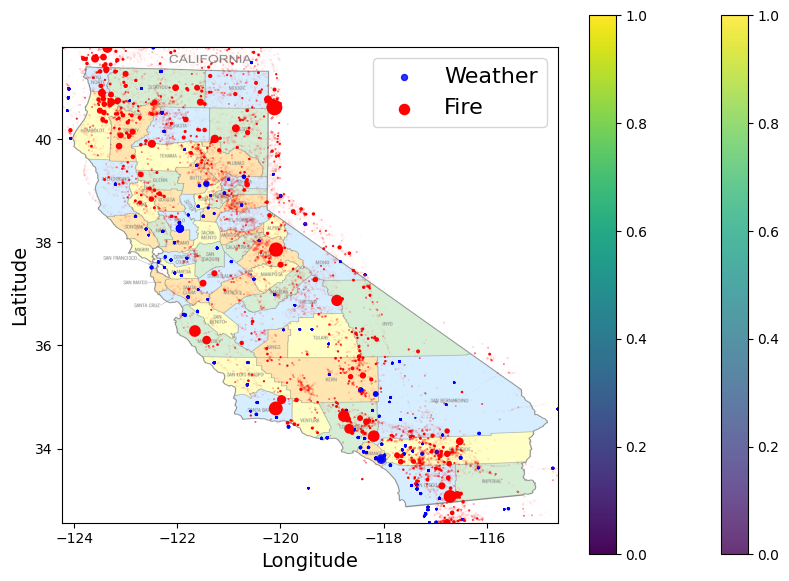

In [ ]:
# This is a excellent discussion of the ideas involved in a plot with a colorbar
# https://stackoverflow.com/questions/19816820/how-to-retrieve-colorbar-instance-from-figure-in-matplotlib
# What's called a "scalar mappable" in that discussion might also be called a scalar-valued function,
# a function that assigns a scalar value to each x,y point being plotted. Our scalar mappable in
# this example is NOT the image of CA, but the housing prices assigned tp each point in the scatter plot.

california_img = mpimg.imread(os.path.join('california.png'))
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
ax = weather.plot(kind='scatter', x="LocationLng", y="LocationLat", figsize=(10,7), s = weather['Precipitation(in)'] / 1.2,
                       label="Weather", c='blue', alpha=0.8, cmap=plt.get_cmap("jet"),
                       colorbar=True
                      )
wildfires.plot(kind="scatter", x= "LONGITUDE", y= "LATITUDE", s= wildfires['FIRE_SIZE'] / 3000,
                       label="Fire" , c='red' ,ax=ax , alpha=0.99, cmap=plt.get_cmap("jet"),
                       colorbar=True
                      )

plt.imshow(california_img, extent=[-124.238, -114.6189, 32.563, 41.7837], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

In [ ]:
wildfires.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,COUNTY
0,2005,33,1300.0,9.0,Miscellaneous,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,63.0
1,2004,133,845.0,1.0,Lightning,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,61.0
2,2004,152,1921.0,5.0,Debris Burning,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,17.0
3,2004,180,1600.0,1.0,Lightning,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,3.0
4,2004,180,1600.0,1.0,Lightning,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,3.0


In [ ]:
weather.Type.value_counts()

Fog              148727
Rain             130986
Cold              12930
Snow              12552
Storm              2287
Precipitation      1912
Hail                 31
Name: Type, dtype: int64

In [ ]:
import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]
color_scale1 = [(0, 'teal'), (1,'blue')]

fig = px.scatter_mapbox(wildfires, 
                        lat= "LATITUDE", 
                        lon= "LONGITUDE", 
                        color= "FIRE_SIZE_CLASS",
                        category_orders = {'FIRE_SIZE_CLASS': ['A', 'B', 'C',
                                                              'D', 'E', 'F',
                                                              'G']},
                        color_discrete_sequence=px.colors.qualitative.G10,
                        size= "FIRE_SIZE",
                        opacity=0.7,
                        zoom=5.5, 
                        height=600,
                        width=600
                        )
fig.add_trace(px.scatter_mapbox(weather,
                                lat="LocationLat",
                                lon="LocationLng",
                                color ='Type',
                                #category_orders = {'Type': ['Fog', 'Rain', 'Cold',
                                #                            'Snow', 'Storm', 'Precipitation', 
                                #                            'Hail']},
                                color_continuous_scale=px.colors.qualitative.T10,
                                #size ='Precipitation(in)',
                                opacity=0.1
                                ).data[0])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_layout(legend_tracegroupgap=2)
fig.update_layout(showlegend=True)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
wildfires_2015 = wildfires[wildfires['FIRE_YEAR'] == 2015] #filter by years
wildfires_2015.shape

(4844, 14)

In [ ]:
wildfire_2015arr = wildfires_2015[['LATITUDE', 'LONGITUDE', 'FIRE_SIZE']]
fire_arr = wildfire_2015arr.to_numpy().astype(float)

print(wildfire_2015arr)
print(fire_arr.dtype)

         LATITUDE   LONGITUDE  FIRE_SIZE
174942  38.633611 -119.789444       0.10
174943  38.224722 -119.381944     120.00
174944  38.528056 -119.553333       0.25
174945  38.365000 -119.523611       1.00
174946  38.550833 -119.611667       0.10
...           ...         ...        ...
181383  33.709175 -116.179773       0.02
181384  40.476117 -123.943617       0.01
181386  38.172881 -120.801955       0.10
181387  33.919157 -116.882973       0.10
181389  39.365926 -123.233855       0.01

[4844 rows x 3 columns]
float64


In [ ]:
weather_2016arr = weather_2016[['LocationLat', 'LocationLng', 'Precipitation(in)']]
weather_arr = weather_2016arr.to_numpy().astype(float)
print(weather_2016arr)
print(weather_arr.dtype)

        LocationLat  LocationLng  Precipitation(in)
0           36.9394    -121.7900               0.00
1           36.9394    -121.7900               0.02
2           36.9394    -121.7900               0.22
3           36.9394    -121.7900               0.23
4           36.9394    -121.7900               1.11
...             ...          ...                ...
309334      40.0167    -124.0667               0.19
309335      40.0167    -124.0667               0.20
309336      40.0167    -124.0667               0.19
309337      40.0167    -124.0667               0.53
309338      40.0167    -124.0667               0.23

[48946 rows x 3 columns]
float64


In [ ]:
#map
zoom_factor = 5 
#radius_scaling = 3000

ca_map = folium.Map (location = [36,-120], tiles="Stamen Terrain", zoom_start = zoom_factor)

for i in range (0, len(fire_arr)):
      folium.Circle(
      location=[ fire_arr[:,0][i], fire_arr[:,1][i]],
      radius= (fire_arr[:,2][i])/3000,
      color='red',
      fill=True,
      fill_color='red'
   ).add_to(ca_map)
        
for i in range (0,len(weather_arr)):
    folium.Circle(
      location=[weather_arr[:,0][i], weather_arr[:,1][i]],
      radius= (weather_arr[:,2][i])/1.2,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(ca_map)
ca_map

In [ ]:
wildfires_2015.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,COUNTY,geometry
174942,2015,189,1100.0,1.0,Lightning,190.0,1500.0,0.10,A,38.633611,-119.789444,USFS,003,POINT (-119.78944 38.63361)
174943,2015,224,1417.0,1.0,Lightning,236.0,2000.0,120.00,D,38.224722,-119.381944,USFS,051,POINT (-119.38194 38.22472)
174944,2015,180,2124.0,1.0,Lightning,183.0,1257.0,0.25,A,38.528056,-119.553333,USFS,051,POINT (-119.55333 38.52806)
174945,2015,166,1328.0,9.0,Miscellaneous,166.0,1853.0,1.00,B,38.365000,-119.523611,USFS,051,POINT (-119.52361 38.36500)
174946,2015,178,2200.0,1.0,Lightning,179.0,1610.0,0.10,A,38.550833,-119.611667,USFS,003,POINT (-119.61167 38.55083)
